In [76]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import numpy as np
import pysal as ps
import folium

from shapely.geometry import Point

from folium import IFrame
from folium.plugins import MarkerCluster

In [196]:
berlin_file = "./data/Berlin__RBSOrtsteile"

berlin_df = gpd.read_file(berlin_file, encoding='utf-8')

print(type(berlin_df))

berlin_df

<class 'geopandas.geodataframe.GeoDataFrame'>


OBJECTID   ORT                 Ortsteilna Beznr  \
0          1  1102                 Karlshorst    11   
1          2  0312                  Rosenthal    03   
2          3  0706                Lichtenrade    07   
3          4  0405                    Westend    04   
4          5  1001                    Marzahn    10   
5          6  0103               Hansaviertel    01   
6          7  0905          Niederschöneweide    09   
7          8  0502                 Haselhorst    05   
8          9  0703                  Tempelhof    07   
9         10  0509               Wilhelmstadt    05   
10        11  0309                       Buch    03   
11        12  0803                     Buckow    08   
12        13  0403              Schmargendorf    04   
13        14  1004                  Mahlsdorf    10   
14        15  0301            Prenzlauer Berg    03   
15        16  0505                      Gatow    05   
16        17  0106              Gesundbrunnen    01   
17        18  1208                     Lübars    12   
18        19  0902                Plänterwald    09   
19        20  1109       Neu-Hohenschönhausen    11   
20        21  0607                    Wannsee    06   
21        22  0704                 Mariendorf    07   
22        23  0310       Französisch Buchholz    03   
23        24  0804                      Rudow    08   
24        25  0404                  Grunewald    04   
25        26  0101                      Mitte    01   
26        27  0911            Friedrichshagen    09   
27        28  1005                Hellersdorf    10   
28        29  0304                Heinersdorf    03   
29        30  0602               Lichterfelde    06   
..       ...   ...                        ...   ...   
66        67  1204                Heiligensee    12   
67        68  0313                Wilhelmsruh    03   
68        69  0603                   Lankwitz    06   
69        70  0702                  Friedenau    07   
70        71  1210         Märkisches Viertel    12   
71        72  1104                 Falkenberg    11   
72        73  0402                Wilmersdorf    04   
73        74  0802                      Britz    08   
74        75  0306  Stadtrandsiedlung Malchow    03   
75        76  0915                Schmöckwitz    09   
76        77  1205                    Frohnau    12   
77        78  0105                    Wedding    01   
78        79  0907                  Adlershof    09   
79        80  0504                    Staaken    05   
80        81  0914                 Müggelheim    09   
81        82  0604                 Zehlendorf    06   
82        83  1101            Friedrichsfelde    11   
83        84  0705                Marienfelde    07   
84        85  1107                 Wartenberg    11   
85        86  0901                Alt-Treptow    09   
86        87  0102                     Moabit    01   
87        88  0910                   Köpenick    09   
88        89  0303                Blankenburg    03   
89        90  1211                Borsigwalde    12   
90        91  0601                   Steglitz    06   
91        92  1111                  Fennpfuhl    11   
92        93  0202                  Kreuzberg    02   
93        94  0904               Johannisthal    09   
94        95  1202                      Tegel    12   
95        96  0501                    Spandau    05   

                       Bezname  \
0                  Lichtenberg   
1                       Pankow   
2         Tempelhof-Schöneberg   
3   Charlottenburg-Wilmersdorf   
4          Marzahn-Hellersdorf   
5                        Mitte   
6             Treptow-Köpenick   
7                      Spandau   
8         Tempelhof-Schöneberg   
9                      Spandau   
10                      Pankow   
11                    Neukölln   
12  Charlottenburg-Wilmersdorf   
13         Marzahn-Hellersdorf   
14                      Pankow   
15                     Spandau   
16             

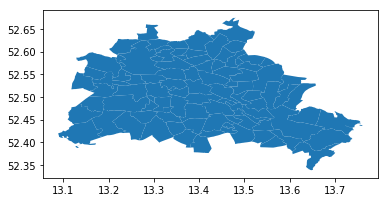

In [197]:
berlin_df.plot()

In [198]:
len(berlin_df.Bezname.unique())

12

In [199]:
len(berlin_df.Ortsteilna.unique())

96

In [200]:
berlin_df.total_bounds

array([13.08834555, 52.33824316, 13.76114047, 52.67550774])

In [201]:
berlin_df.crs

{'init': u'epsg:4326'}

In [202]:
rents_df = pd.read_csv('./data/rent/2018-06-19-12-55-Wohnung-Miete.csv', sep=',', encoding='utf-8')

In [203]:
print(rents_df.head())

          ID Haus/Wohnung         ID.1 Miete/Kauf  \
0  100027976      Wohnung  100027976.0      Miete   
1  100122011      Wohnung  100122011.0      Miete   
2  100149210      Wohnung  100149210.0      Miete   
3  100150862      Wohnung  100150862.0      Miete   
4  100155473      Wohnung  100155473.0      Miete   

                                             address balcony builtInKitchen  \
0        Pohlestraße 14, Köpenick (Köpenick), Berlin    True           True   
1      Soldiner Straße 35, Wedding (Wedding), Berlin   False          False   
2   Vopeliuspfad 10, Zehlendorf (Zehlendorf), Berlin    True           True   
3  Rudolf-von-Gneist-Gasse 1, Tiergarten (Tiergar...    True           True   
4  Wackenbergstr. 57, Niederschönhausen (Pankow),...    True           True   

     city floorplan                                      from    ...      \
0  Berlin      True                               001.3112839    ...       
1  Berlin     False                                001

In [204]:
rents_df.columns

Index([u'ID', u'Haus/Wohnung', u'ID.1', u'Miete/Kauf', u'address', u'balcony',
       u'builtInKitchen', u'city', u'floorplan', u'from', u'garden', u'lat',
       u'livingSpace', u'lon', u'numberOfRooms', u'postcode', u'price',
       u'privateOffer', u'quarter', u'title', u'url', u'price_sq_m'],
      dtype='object')

In [205]:
rents_df.describe()

ID.1          lat  livingSpace          lon  numberOfRooms  \
count  3.320000e+03  2745.000000  3319.000000  2745.000000    3319.000000   
mean   1.015846e+08    52.508675    84.069165    13.392040       2.612775   
std    9.757116e+06     0.047268    44.486373     0.102521       1.144726   
min    1.300000e+01    52.373770    13.000000    13.131080       1.000000   
25%    1.036808e+08    52.480290    56.790000    13.326660       2.000000   
50%    1.049826e+08    52.511020    73.640000    13.385910       2.000000   
75%    1.053854e+08    52.540160   101.055000    13.448090       3.000000   
max    1.055759e+08    52.643110   482.000000    13.689940      11.000000   

           postcode          price    price_sq_m  
count   3319.000000    3319.000000   3318.000000  
mean   11923.113287    1299.200820     21.447534  
std     1423.525552    9780.815125    463.332823  
min    10115.000000     226.000000      4.922199  
25%    10557.000000     615.000000     10.000000  
50%    12205.000000     899.000000     12.500000  
75%    13156.000000    1394.000000     15.875000  
max    37127.000000  562585.000000  26700.759374

In [206]:
len(rents_df.quarter.unique())

76

In [208]:
rents_df.loc[pd.isnull(rents_df['quarter'])]

ID  \
270  Ideal geschnittene Wohnung in einer super Lage!   

                                          Haus/Wohnung  ID.1 Miete/Kauf  \
270  https://www.immobilienscout24.de/expose/103403800  13.0        NaN   

    address balcony builtInKitchen city floorplan from    ...     livingSpace  \
270     NaN     NaN            NaN  NaN       NaN  NaN    ...             NaN   

     lon  numberOfRooms  postcode  price  privateOffer  quarter title  url  \
270  NaN            NaN       NaN    NaN           NaN      NaN   NaN  NaN   

    price_sq_m  
270        NaN  

[1 rows x 22 columns]

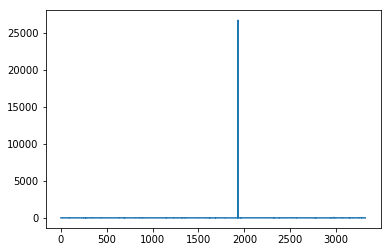

In [209]:
rents_df['price_sq_m'].plot()

In [210]:
rents_df.loc[rents_df['url'] == 'https://www.immobilienscout24.de/expose/105348497', 'price'] = 562.585

In [211]:
rents_df.loc[rents_df['url'] == 'https://www.immobilienscout24.de/expose/105348497', 'price_sq_m'] = 26.7

In [212]:
rents_df.loc[rents_df['url'] == 'https://www.immobilienscout24.de/expose/105348497', ['price', 'price_sq_m']]

price  price_sq_m
1930  562.585        26.7

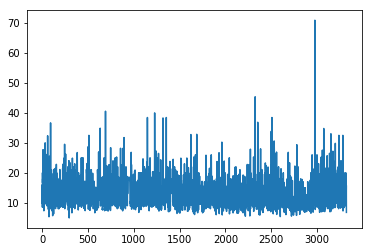

In [213]:
rents_df['price_sq_m'].plot()

In [214]:
rents_df.loc[pd.isna(rents_df['lat'])].shape

(575, 22)

In [215]:
from geopy.geocoders import Nominatim
from time import sleep

coords = {}
geolocator = Nominatim()


def find_coords(row):

    location = None

    if pd.isnull(row['lat']) or pd.isnull(row['lon']): 

        print 'Lat or lon none. Trying geocoding'

        if coords.has_key(row['address']):  # test if result is already cached
            row['lat'], row['lon'] = coords[row['address']]
            print('Found ', row['address'], ' in cache: ', coords[row['address']])
            return pd.Series([row['lat'], row['lon']])

        print 'Geocoding address ', row['address']

        location = geolocator.geocode(row['address'], timeout=None)
        sleep(2)

        if location is None: 

            print 'Could not find ', row['address'], '. Trying quarter next.'

            location = geolocator.geocode(row['quarter'], timeout=None)
            sleep(2)

            if location is None:
                print 'Could not find ', row['quarter'], ' either.'
                return pd.Series([row['lat'], row['lon']])
            else:
                print 'Found ', row['quarter'], ': ', location.latitude, location.longitude
                coords[row['address']] = (location.latitude, location.longitude)    
                return pd.Series([location.latitude, location.longitude])
            
        else:
            print 'Found ', row['address'], ': ', location.latitude, location.longitude
            coords[row['address']] = (location.latitude, location.longitude)    
            return pd.Series([location.latitude, location.longitude])
    
    else:
        #print 'Lat or lon are not none.'
        
        return pd.Series([row['lat'], row['lon']])

        


rents_df[['lat1', 'lon1']] = rents_df.apply(find_coords, axis=1)

Lat or lon none. Trying geocoding
Geocoding address  Mitte (Mitte), Berlin
Found  Mitte (Mitte), Berlin :  52.5176896 13.4023757
Lat or lon none. Trying geocoding
Geocoding address  Johannisthal (Treptow), Berlin
Found  Johannisthal (Treptow), Berlin :  52.4459114 13.504547
Lat or lon none. Trying geocoding
Geocoding address  Lichtenberg (Lichtenberg), Berlin
Found  Lichtenberg (Lichtenberg), Berlin :  52.5196723 13.4950457
Lat or lon none. Trying geocoding
Geocoding address  Friedrichshain (Friedrichshain), Berlin
Found  Friedrichshain (Friedrichshain), Berlin :  52.5122154 13.4502904
Lat or lon none. Trying geocoding
('Found ', u'Friedrichshain (Friedrichshain), Berlin', ' in cache: ', (52.5122154, 13.4502904))
Lat or lon none. Trying geocoding
Geocoding address  Charlottenburg (Charlottenburg), Berlin
Found  Charlottenburg (Charlottenburg), Berlin :  52.5037425 13.3299596
Lat or lon none. Trying geocoding
('Found ', u'Mitte (Mitte), Berlin', ' in cache: ', (52.5176896, 13.4023757))


In [216]:
rents_df.loc[pd.isna(rents_df['lat1'])].shape

(0, 24)

In [217]:
rents_df.drop(['lat', 'lon'], axis = 1, inplace=True)

In [218]:
rents_df_new = rents_df.loc[(rents_df.lat1 >= 52.3303) & (rents_df.lat1 <= 52.6675) & (rents_df.lon1 >= 13.0535) & (rents_df.lon1 <= 13.7262)]

In [220]:
rents_df_new.to_csv('./data/rent/geocoded_rents.csv', sep=',', encoding='utf-8')

In [221]:
rents_geom = [Point(xy) for xy in zip(rents_df_new.lon1, rents_df_new.lat1)]

In [222]:
rents_df_temp = rents_df_new.drop(['lat1', 'lon1'], axis = 1)
crs = {'init': 'epsg:4326'}

rents_gdf = gpd.GeoDataFrame(rents_df_temp, crs=crs, geometry=rents_geom)

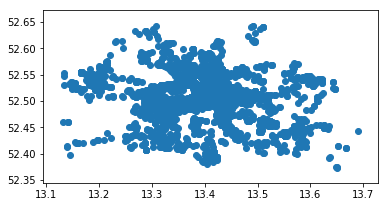

In [223]:
rents_gdf.plot()

In [224]:
rents_gdf.shape

(3262, 21)

In [225]:
rents_with_districts = gpd.sjoin(berlin_df, rents_gdf)

In [226]:
rents_with_districts.shape

(3253, 27)

In [227]:
avg_rents = gpd.sjoin(berlin_df, rents_gdf).groupby('OBJECTID').agg({'price_sq_m' : np.mean})

In [228]:
rents_with_districts.shape, avg_rents.shape

((3253, 27), (88, 1))

In [229]:
avg_rents_with_districts = pd.merge(berlin_df, avg_rents, left_on='OBJECTID', right_on='OBJECTID')

In [230]:
avg_rents_with_districts.head()

OBJECTID   ORT   Ortsteilna Beznr                     Bezname  \
0         1  1102   Karlshorst    11                 Lichtenberg   
1         2  0312    Rosenthal    03                      Pankow   
2         3  0706  Lichtenrade    07        Tempelhof-Schöneberg   
3         4  0405      Westend    04  Charlottenburg-Wilmersdorf   
4         5  1001      Marzahn    10         Marzahn-Hellersdorf   

                                            geometry  price_sq_m  
0  POLYGON ((13.5058337078815 52.4911663667287, 1...   10.556429  
1  POLYGON ((13.3748609896621 52.5849015535632, 1...   11.903962  
2  POLYGON ((13.3963154428129 52.4175789962893, 1...    9.284803  
3  POLYGON ((13.2874646673229 52.5023678928998, 1...   13.092441  
4  POLYGON ((13.5185982721988 52.5145347292375, 1...    8.177116

In [1]:
avg_rents_with_districts.plot(column='price_sq_m', cmap='OrRd', scheme='Fisher_Jenks')

NameError: name 'avg_rents_with_districts' is not defined

In [232]:
print('Producing folium choropleth and cluster marker visualization for rents')
# Create a Folium basemap centered in Berlin 
rents_map = folium.Map([52.5161,13.3770], zoom_start = 10)

def add_choropleth_to_map(mapobj):

    # Generate the list of threshold values for classification based on a Fisher Jenks classifier
    my_threshold_scale = ps.esda.mapclassify.Fisher_Jenks(avg_rents_with_districts['price_sq_m']).bins.tolist()
    
    # Call the Folium choropleth function, specifying the geometry from the GeoDataFrame converted to GeoJSON 
    # and the data as the GeoDataFrame
    mapobj.choropleth(geo_data = avg_rents_with_districts.to_json(), data = avg_rents_with_districts, \
                      columns = ['OBJECTID', 'price_sq_m'], key_on = 'feature.properties.{}'.format('OBJECTID'), \
                      fill_color = 'YlOrRd', fill_opacity = 0.6, line_opacity = 0.2, \
                      threshold_scale = my_threshold_scale)
    
    return mapobj

# Add the choropleth to the basemap
rents_map=add_choropleth_to_map(rents_map)

Producing folium choropleth and cluster marker visualization for rents


In [233]:
def add_clusters_to_map(mapobj):
    
    # The location coordinates and the pop-ups for the single activity markers
    coords, popups = [], [] 
    
    # The information to be shown in the marker pop-ups
    popup_fields = ['url', 'price_sq_m']
    
    for i, row in rents_gdf.iterrows():
        # Populate the list of coordinates with the list of activites
        coords.append([row.geometry.y, row.geometry.x])
        
        # Create HTML for the IFrame popup
        label = '<br>'.join([str(row[field]) for field in popup_fields])
        
        # Append the IFrame containing the HTML to the pop-ups list 
        popups.append(IFrame(label, width = 300, height = 100))
        
    # Create a Folium feature group, since we will be displaying multiple layers
    point_layer = folium.FeatureGroup(name = 'point_layer')
    
    # Add the clustered points and pop-ups to this layer
    point_layer.add_child(MarkerCluster(locations = coords, popups = popups))
    
    # Add this point layer to the map object
    mapobj.add_child(point_layer)
    
    return mapobj

# Add the clusters layer to the map 
rents_map = add_clusters_to_map(rents_map)

In [234]:
folium.LayerControl().add_to(rents_map) # Allows layers to be toggled on/off in the map

rents_map.save('rents_map1.html') # Save map as HTML file

print('Saving visualization under: rents_map.html')

Saving visualization under: rents_map.html


In [235]:
rents_map

In [50]:
rents_joined.head()

price_sq_m
OBJECTID            
1          10.556429
2          11.094358
3           9.183537
4          13.092441
5           8.191744

In [32]:
rents_df[rents_df['price_sq_m'] > 50][['price', 'numberOfRooms', 'price_sq_m', 'livingSpace', 'url']]

price  numberOfRooms  price_sq_m  livingSpace  \
2974  3390.0            4.0   61.636364         55.0   
2975  1490.0            1.5   70.952381         21.0   
2976  1990.0            2.0   66.333333         30.0   
2977  1690.0            1.0   67.600000         25.0   
2978  1790.0            2.0   52.647059         34.0   

                                                   url  
2974  https://www.immobilienscout24.de/expose/79468594  
2975  https://www.immobilienscout24.de/expose/79469157  
2976  https://www.immobilienscout24.de/expose/79469490  
2977  https://www.immobilienscout24.de/expose/79469592  
2978  https://www.immobilienscout24.de/expose/79469862

## Pick a region

Click on a region on the map to find the activities and the regions corresponding to them.

In [148]:
from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim()

coords = {}

for i, row in rents_df.loc[pd.isna(rents_df['lat'])].iterrows():
    
    if coords.has_key(row['address']):   ## test if result is already cached
        row['lat'], row['lon'] = coords[row['address']]
        continue
            
    location = geolocator.geocode(row['address'], timeout=None)
    sleep(2)
    
    if location is None:
        
        print row['address']
        
        location = geolocator.geocode(row['quarter'], timeout=None)
        sleep(2)
        
        if location is None:
            print row['quarter']
            continue
            
        
    
    print row['address'], row['quarter'], location.latitude, location.longitude        
        
    row['lat'] = location.latitude
    
    row['lon'] = location.longitude
    
    coords[row['address']] = (row['lat'] , row['lon'])

Mitte (Mitte), Berlin Mitte (Mitte) 52.5176896 13.4023757
Johannisthal (Treptow), Berlin Johannisthal (Treptow) 52.4459114 13.504547
Lichtenberg (Lichtenberg), Berlin Lichtenberg (Lichtenberg) 52.5196723 13.4950457
Friedrichshain (Friedrichshain), Berlin Friedrichshain (Friedrichshain) 52.5122154 13.4502904
Charlottenburg (Charlottenburg), Berlin Charlottenburg (Charlottenburg) 52.5037425 13.3299596
Nikolassee (Zehlendorf), Berlin Nikolassee (Zehlendorf) 52.4262495 13.1981446
Schöneberg (Schöneberg), Berlin Schöneberg (Schöneberg) 52.99098135 14.1731570069
Lichterfelde (Steglitz), Berlin Lichterfelde (Steglitz) 52.437293 13.3138645
Schmargendorf (Wilmersdorf), Berlin Schmargendorf (Wilmersdorf) 52.4819508 13.309856
Tegel (Reinickendorf), Berlin Tegel (Reinickendorf) 52.5873891 13.2790461
Wilmersdorf (Wilmersdorf), Berlin Wilmersdorf (Wilmersdorf) 52.4758015 13.3248541
Prenzlauer Berg (Prenzlauer Berg), Berlin Prenzlauer Berg (Prenzlauer Berg) 52.5282739 13.4233062
Grunewald (Wilmersdor

In [139]:
from geopy.geocoders import Nominatim


geolocator = Nominatim()
    
location = geolocator.geocode('Pepita Promenade 15, Spandau, Berlin')
    
if location is None:
    print 'None'
else:
    print location

None
